## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./ex1/ex1data1-csv.csv')
df.head()

,Profit in $10000s,Population of City in 10000s
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Population of City in 10000s')

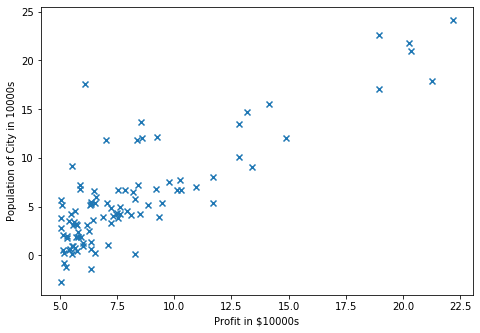

In [3]:
x = np.array(df['Profit in $10000s'])
x = np.array(x).reshape((x.size,1))
y = np.array(df['Population of City in 10000s'])
y = np.array(y).reshape((y.size,1))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(x,y,marker='x')
ax.set_xlabel('Profit in $10000s')
ax.set_ylabel('Population of City in 10000s')

In [4]:
x_feat = np.ones((x.size,1))
x_feat = np.append(x_feat,x,axis=1)
#x_feat
theta = np.zeros((2,1))
#theta = np.array([[-1],[2]])
#theta

In [5]:
def CostFunction(x_, theta_, y_):
    Xtheta = x_.dot(theta_)
    return 1/(2*x_.shape[0])*(Xtheta - y_).transpose().dot(Xtheta - y_)

In [6]:
t = CostFunction(x_feat, theta, y)
t

array([[32.07273388]])

In [7]:
def GradientDescent(x_, theta_, y_, alpha_, numIters_):
    JHistory = np.zeros((numIters_, 1))
    for iter in range(1, numIters_):
        XTheta = x_.dot(theta_)
        theta_ = theta_ - alpha_ / x_.shape[0] * x_.transpose().dot(XTheta - y_)
        JHistory[iter] = CostFunction(x_, theta_, y_)
    return JHistory, theta_

In [8]:
numIters = 1600
alpha = 0.01
jHis, thetaFinal = GradientDescent(x_feat, theta, y, alpha, numIters)
thetaFinal

array([[-3.67371879],
       [ 1.1707251 ]])

Text(0, 0.5, 'Cost Function')

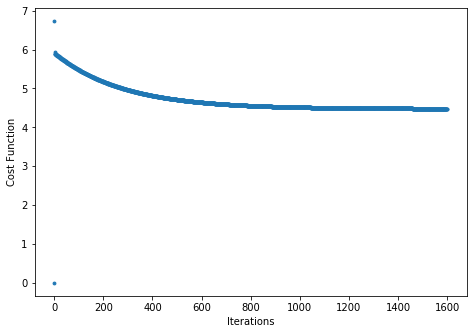

In [9]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
ax1.scatter(range(numIters), jHis, s=8)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost Function')

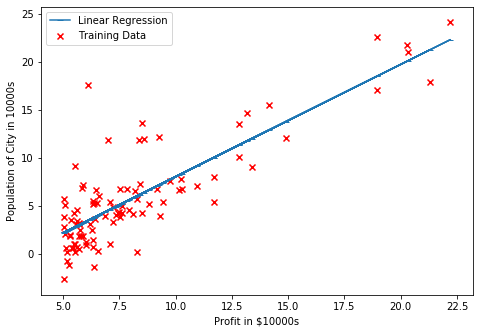

In [10]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
ax2.plot(df['Profit in $10000s'], x_feat.dot(thetaFinal), marker='_', label='Linear Regression')
ax2.scatter(df['Profit in $10000s'], df['Population of City in 10000s'], marker='x',c='r', label='Training Data')
ax2.set_xlabel('Profit in $10000s')
ax2.set_ylabel('Population of City in 10000s')
ax2.legend()

## Linear regression with multiple variables

In [11]:
df1 = pd.read_csv('./ex1/ex1data2-csv.csv')
df1.head()

,Area(ft^2),no. of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [12]:
df1.describe()

,Area(ft^2),no. of bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [13]:
x1 = np.array(df1[['Area(ft^2)', 'no. of bedrooms']])
y1 = np.array(df1['price'])
y1.resize((y1.size, 1))

In [14]:
# feature normalization
mu = np.mean(x1, axis=0, dtype=np.float64)
sigma = np.std(x1, axis=0, dtype=np.float64)
x1_norm = x1 - mu
x1_norm = x1_norm / sigma

In [15]:
# add column of ones
a = np.ones([np.size(x1, 0), 1])
x1 = np.hstack((a, x1))
x1_norm = np.hstack((a, x1_norm))

In [16]:
# gradient descent
alpha1 = 0.03
numIters1 = 170
theta1 = np.zeros((3, 1))
jHistory, theta1 = GradientDescent(x1_norm, theta1, y1, alpha1, numIters1)
theta1

array([[338433.73704138],
       [103292.05613458],
       [  -453.83674278]])

In [17]:
price = np.array([1, (1650 - mu[0])/sigma[0], (3-mu[1]/sigma[1])]).dot(theta1)
price

array([292910.54087214])

Text(0, 0.5, 'Cost Function')

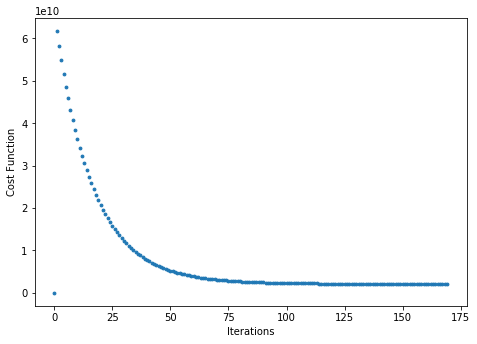

In [18]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0, 0, 1, 1])
ax3.scatter(range(numIters1), jHistory, s=8)
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost Function')

In [19]:
def NormalEquation(x_, y_):
    thetaRet = np.dot(np.linalg.inv(x_.transpose().dot(x_)), x_.transpose()).dot(y_)
    return thetaRet

In [20]:
theta2 = NormalEquation(x1, y1)
theta2

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [21]:
price = np.array([1, 1650, 3]).dot(theta2)
price

array([293081.46433489])